In [ ]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
latent_space = pd.read_csv('/content/drive/My Drive/latentspace.csv')
print(latent_space.shape)

latent_space = latent_space.to_numpy()
print(latent_space.shape)

latent_space = latent_space[:,1:]
print(latent_space)
print(latent_space.shape)

(3835, 6)
(3835, 6)
[[-0.41695562  2.023221   -0.9875449  -0.38100109  0.24567433]
 [-0.20962098  2.1624527  -1.0506359   0.21378677 -0.15306966]
 [-0.2618443   1.9197503  -0.88339067 -0.10941549  0.0629306 ]
 ...
 [-0.499401    2.0594177  -0.88010186 -0.5364299   0.40935707]
 [-0.04088476  1.057194   -0.27703646 -0.17771913  0.0740221 ]
 [-0.28456813  0.26865196 -0.01213319 -0.04156853 -0.00564802]]
(3835, 5)


In [ ]:
tsne = TSNE(n_components=2, random_state=0, verbose=1)
latent_space_2d = tsne.fit_transform(latent_space)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3835 samples in 0.005s...
[t-SNE] Computed neighbors for 3835 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3835
[t-SNE] Computed conditional probabilities for sample 2000 / 3835
[t-SNE] Computed conditional probabilities for sample 3000 / 3835
[t-SNE] Computed conditional probabilities for sample 3835 / 3835
[t-SNE] Mean sigma: 0.100359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.138290
[t-SNE] KL divergence after 1000 iterations: 0.886567


Estimated no. of clusters: 10
Estimated no. of noise points: 896


[Text(0.5, 1.0, 'Lightcurve Clustering')]

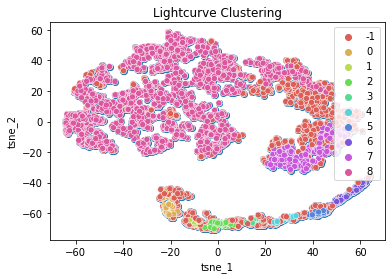

In [ ]:
#HDBSCAN

#!pip install hdbscan
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(latent_space)
labels = clusterer.labels_

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# print(labels[1000:2000])

latent_space_2d_result_df = pd.DataFrame({'tsne_1': latent_space_2d[:,0], 'tsne_2': latent_space_2d[:,1]})
fig, ax = plt.subplots(1)

plt.scatter(latent_space_2d_result_df.tsne_1, latent_space_2d_result_df.tsne_2)

sns.scatterplot(x="tsne_1", y="tsne_2",
                palette=sns.color_palette("hls", 10), hue=labels.tolist(),
                data=latent_space_2d_result_df).set(title="Lightcurve Clustering")

In [ ]:
#PLOTTING SAMPLE LIGHTCURVES FOR EACH CATEGORY
import csv 

fields = []
rows = []
with open("/content/drive/My Drive/latentspacefinal.csv", 'r') as file:
    read = csv.reader(file)
    fields = next(read)
    for row in read:
        rows.append(row[6])

indices = {}
for i in range(-1, 9):
  indices[i] = []

for i in range(len(labels)):
  indices[labels[i]].append(rows[i])

for item in indices:
  print(item)
  print(indices[item][0:20])

-1
['44.0', '45.0', '56.0', '59.0', '64.0', '66.0', '73.0', '88.0', '89.0', '92.0', '97.0', '104.0', '109.0', '113.0', '114.0', '118.0', '134.0', '138.0', '140.0', '149.0']
0
['63.0', '155.0', '224.0', '275.0', '314.0', '340.0', '408.0', '420.0', '454.0', '479.0', '485.0', '540.0', '542.0', '581.0', '746.0', '926.0', '937.0', '948.0', '992.0', '1074.0']
1
['358.0', '388.0', '805.0', '971.0', '976.0', '983.0', '1021.0', '1024.0', '1168.0', '1299.0', '1399.0', '1403.0', '1601.0', '1667.0', '1880.0', '2051.0', '2424.0', '2809.0', '2873.0', '2922.0']
2
['43.0', '279.0', '343.0', '354.0', '373.0', '399.0', '552.0', '556.0', '662.0', '799.0', '922.0', '942.0', '978.0', '1187.0', '1203.0', '1281.0', '1304.0', '1325.0', '1368.0', '1395.0']
3
['247.0', '356.0', '571.0', '638.0', '686.0', '1067.0', '1436.0', '1564.0', '1672.0', '2194.0', '2564.0', '2672.0', '2766.0', '2798.0', '2898.0', '3058.0', '3352.0', '3594.0', '3767.0', '3807.0']
4
['219.0', '237.0', '245.0', '311.0', '378.0', '487.0', '55